# Boston Housing Price Dataset

<p><b>Status: <span style=color:orange;>In progress</span></b></p>

##### LOAD THE DATA
Build the dataset from the dataset file

In [1]:
import pandas as pd
import numpy as np

# like in math, these will be the 'X' variables
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
            'RM', 'AGE', 'DIS', 'RAD', 'TAX',
            'PTRATIO', 'B', 'LSTAT']

# this will be 'Y', or the dependent variable
target = 'MEDV'

# List all columns
columns = features + [target]

# read dataset and make a table
data = pd.read_csv('../../data/housing.data', names=columns, sep='\s+', header=None)
data.head()     # preview the first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### SEPARATE DATASET


In [2]:
# separate feature and target values
Y = data[target]
X = data[features]

print ("Data Shape:\nX: {}\nY: {}".format(X.shape, Y.shape))

print('\nPriting first lines from X data :')
X.head()

Data Shape:
X: (506, 13)
Y: (506,)

Priting first lines from X data :


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


##### DATA OVERVIEW

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### VISUALIZE DISTRIBUTION OF FEATURES

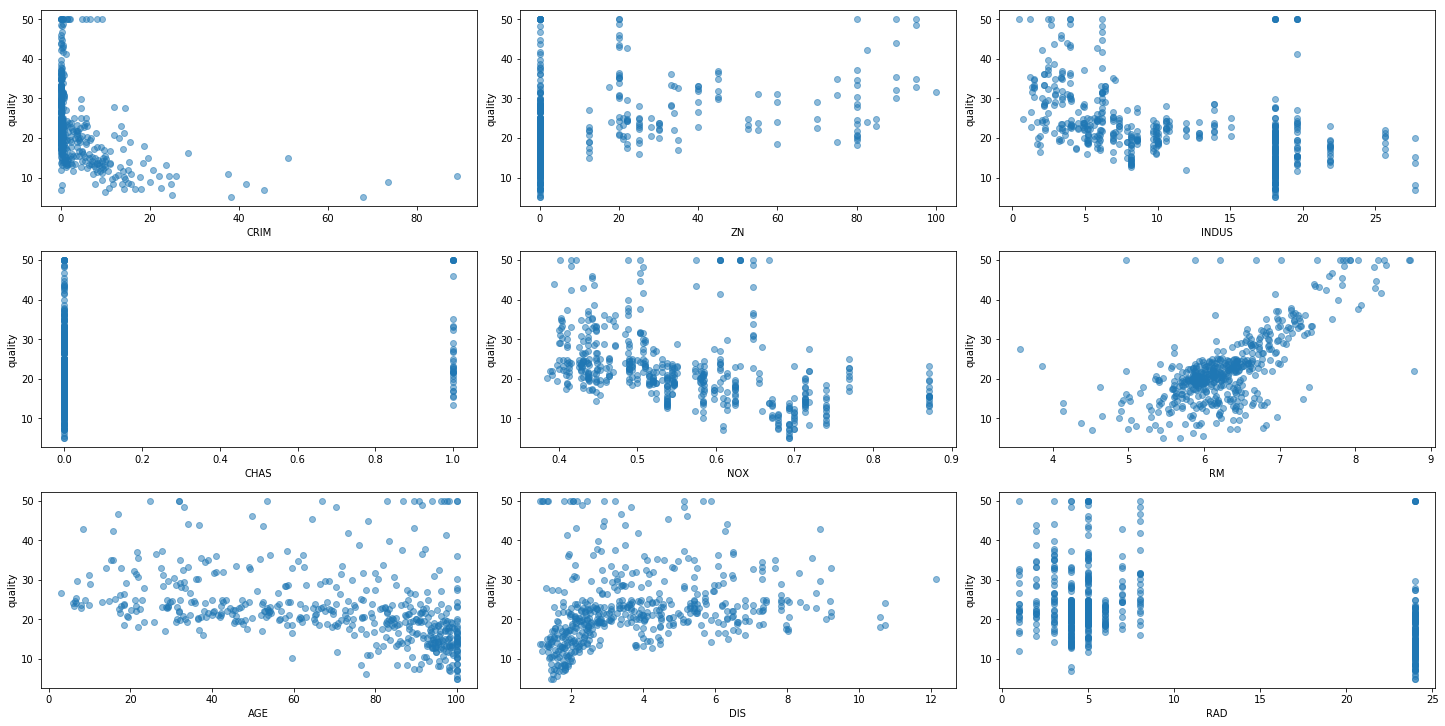

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], Y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

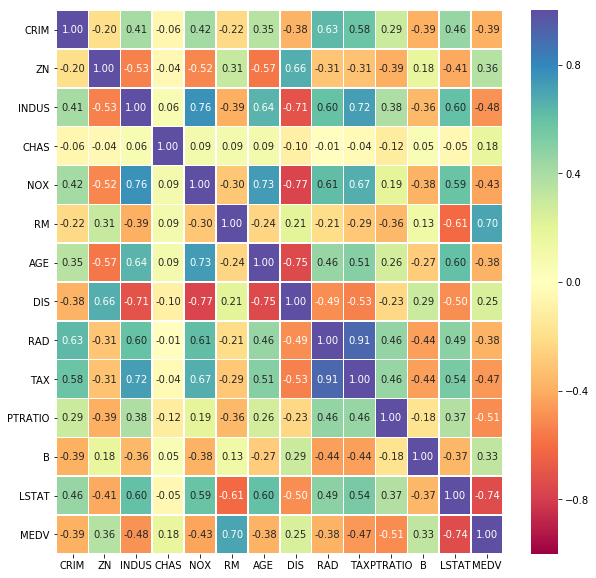

In [6]:
import seaborn as sns

#correlation map view
data.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='Spectral', annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()